In [17]:
#k-Nearest Neighbors

#Q1 Implement a function that does kNN classification, and use it to classify the Iris dataset. 
#Once you get a near-perfect classification there, use your function in the 3DClothing dataset. 
#Plot the accuracy for all odd values of k from 1 to 9. 

# https://archive.ics.uci.edu/ml/datasets/Iris
# https://en.wikipedia.org/wiki/Iris_flower_data_set
# http://scikit-learn.org/stable/modules/neighbors.html
# http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [18]:
import numpy as np
import scipy.spatial.distance as dist
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#  Build matrix
data = np.array([map(float, x.split(',')[:-1]) for x in open('iris.data') if x.strip()!=''])
labels = np.array([x.split(',')[-1].strip() for x in open('iris.data') if x.strip()!=''])
# Handle data train and test
iris_idx_train = np.loadtxt('iris_idx_train.txt')
iris_idx_test = np.loadtxt('iris_idx_test.txt')

iris_idx_train = iris_idx_train.astype(int)
iris_idx_test = iris_idx_test.astype(int)
# Data
iris_data_train = data[iris_idx_train,:]
iris_data_test = data[iris_idx_test,:]
# Labels
iris_labels_train = labels[iris_idx_train]
iris_labels_test = labels[iris_idx_test]

In [20]:
# K-NN Neighboars
# Define the function K-NN with a range  "K '
def runknn(tr_data, tr_labels, te_data, te_labels):
    for k in range(1,9):
        knn = KNeighborsClassifier(k)
        #Below the trainning data
        knn.fit(iris_data_train, iris_labels_train)
        acc = knn.score(iris_data_test, iris_labels_test)
        print 'Accuracy (k=%d): %.4f'%(k,acc)
runknn(iris_data_train, iris_labels_train, iris_data_test, iris_labels_test)

Accuracy (k=1): 0.9400
Accuracy (k=2): 0.9400
Accuracy (k=3): 0.9400
Accuracy (k=4): 0.9400
Accuracy (k=5): 0.9600
Accuracy (k=6): 0.9400
Accuracy (k=7): 0.9600
Accuracy (k=8): 0.9400


In [21]:
# K-NN 
def runknn2(tr_data, tr_labels, te_data, te_labels):
    for k in range(1,9):
        # Below is the getAccuracy function
        distance=dist.cdist(tr_data, te_data)
        k_min = np.argsort(distance.T,1)[:,1:k+1]
        lebel_min = tr_labels [k_min]
        
        accuracy = accuracy_score(te_labels, [Counter(x).most_common()[0][0] for x in lebel_min] )
        
        print 'Accuracy (k=%d): %.4f'%(k,accuracy)
runknn2(iris_data_train, iris_labels_train, iris_data_test, iris_labels_test)

Accuracy (k=1): 0.9400
Accuracy (k=2): 0.9400
Accuracy (k=3): 0.9400
Accuracy (k=4): 0.9400
Accuracy (k=5): 0.9600
Accuracy (k=6): 0.9600
Accuracy (k=7): 0.9600
Accuracy (k=8): 0.9400


In [22]:
####
####
####
####
#https://github.com/sfabrego/RoboticaUVic-Classification
####
####
####
####

In [23]:
#Q2 First we will focus on a two-class problem. 
#Use slicing to get a new training and testing set that only contains the instances corresponding to shirt and jeans (remember to also create new label variables!). 
#Then, train a Logistic Regression classifier, adjusting the C parameter with cross-validation. This time you can chose to use the cross-validation functions provided by sklearn. 
#Plot the training and validation accuracy as C is incresed, and print the test accuracy for the selected model.

In [24]:
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_recall_curve
import pylab as pl

In [ ]:
dat_test = test_data[(test_labels == 'shirt') + (test_labels == 'jeans'),:]
lab_test = test_labels[(test_labels == 'shirt') + (test_labels == 'jeans')]
dat_train = train_data[(train_labels == 'shirt') + (train_labels == 'jeans'),:]
lab_train = train_labels[(train_labels == 'shirt') + (train_labels == 'jeans')]

In [ ]:
# Clasificator object with C = 1
LogReg = LogisticRegression(C=1)
#Trainning with the trainning data
LogReg.fit(dat_train, lab_train)
# Below is the Accuracy function 
print 'Log Reg accuracy', LogReg.score(dat_test, lab_test)


In [5]:
# C = 1 
from sklearn.grid_search import GridSearchCV
# We define the search space for the parameter Cwe define the search for the best C parameter 
parameters = {'C':[10**i for i in range(-7,7)]}
clf = GridSearchCV(LogisticRegression(), parameters, verbose=False)
clf.fit(dat_train, lab_train)
print 'Log Reg with Grid search', clf.score(dat_test, lab_test), 'with C =', clf.best_params_['C']

/home/sergi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sergi/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


NameError: name 'dat_train' is not defined

In [6]:
#Data detfinition
#Let your C search range be from 10^-7 to 10^7.
#Hint: use log-scale for the C value in the plot. Hint: 
#Since we do not have a lot of training data, use 15 folds to ensure the train set will be large enough.

D = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
A = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
P = 0

for i in xrange (-7,7):    
	LogReg = LogisticRegression(C=10**i)
	D[P]=i
	LogReg.fit(train_data, train_labels)
	A[P] = LogReg.score(test_data, test_labels)
	print 'Log Reg accuracy', A[P]
	P+=1
#Plot
pl.plot(D[:14],A[:14])

pl.show()

NameError: name 'train_data' is not defined

In [7]:
#Q3 Now, train a multi-class Logistic Regression classifier with the complete training set. 
#Again, plot the training and validation accuracy as C increases, and print the final test accuracy. 

D = [1,2,3,4,5,6]
A = [1,2,3,4,5,6]
P = 0

for i in xrange (-3,3):    
	LogReg = LogisticRegression(C=10**i)
	D[P]=i
	LogReg.fit(train_data, train_labels)
	A[P] = LogReg.score(test_data, test_labels)
	print 'Log Reg accuracy', A[P]
	P+=1
#Plot
pl.plot(D[:5],A[:5])

pl.show()

NameError: name 'train_data' is not defined

In [8]:
# Q4 Sometimes we want to re-use a trained classified in another system, or with another programming language. 
# Other times we just want to save it to disk for later usage. 
# Given a trained linear classifier object, explain what information should we be saving in order to be able to do so. 
# Next, inspect the "shirts vs jeans" logistic regression classifier object we have trained in Question 2 
# (re-train it if necessary) and identify which variables contain said information. 
# Finally, write the code necessary to use these variables to classify new test samples. 

#Train and test Data
#train_data =np.load ("3dclothing/3dclothing_train.npy")
#test_data =np.load ("3dclothing/3dclothing_test.npy")
#Matrix
#train_labels = np.array([x.strip() for x in open('3dclothing/3dclothing_labels_train.txt')])
#test_labels = np.array([x.strip() for x in open('3dclothing/3dclothing_labels_test.txt')])

for i in xrange (-7,7):    
	LogReg = LogisticRegression(C=10**i)
	LogReg.fit(dat_train, lab_train)
	a = LogReg.score(dat_test, lab_test)
	bias = LogReg.intercept_
	theta = LogReg.coef_
	acc = 1/(1+(np.exp(-np.dot(dat_test, theta.T)-bias)))
print 'New samples', acc

NameError: name 'dat_train' is not defined

In [9]:
#Q6 We will now compare the performance of the linear and the RBF Support Vector Machines in a real dataset: 
#Train the two classifiers in the jeans vs shirts problem from Q2, and compute the accuracy on the test set. 
#What happened? 

In [10]:
#accuracy RBF SVM
for i in xrange (-7,7):    
	LogReg = LogisticRegression(C=10**i)
	LogReg.fit(dat_train, lab_train)
	A = LogReg.score(dat_test, lab_test)
	print 'Log Reg accuracy', A
	clf = SVC(C=10**i)
	clf.fit(train_data, train_labels)
print 'RBF SVM accuracy', clf.score(test_data, test_labels)

NameError: name 'dat_train' is not defined

In [11]:
#We have just finished developing the vision system of a robot waiter to work in a bar. Now we have to evaluate it.
#Q8 After developing a french fries image logistic regression classifier for our robot waiter, we want to know how good it is. We have run the image classifier in 150.000 images, of which 150 are positives. Load the probability of french fries computed by our classifier and the true labels, and compute:
#Accuracy and Error Rate (assume threshold is at 0.5)
#Balanced Error Rate (implies computing True Positive Rate, True Negative Rate)
#F1-score (implies computing also precision and recall) 
#Hint: Since we will consider the whole dataset, there is no need to sort the values.
#Since being a bit slower is prefearable to our robot attacking a client wearing stripes, we are more concerned about precision than recall. Compute the f-beta score with beta=0.5
#Finally, plot the precision-recall curve for our classifier.
#Use the function precision_recall_curve found in sklearn.metrics.


In [12]:
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_recall_curve
import pylab as pl
#Use the function precision_recall_curve found in sklearn.metrics.

In [13]:
#Datos labels scores
labels_data =np.load ("robot_waiter/robot_waiter_fries_labels.npy")
scores_data =np.load ("robot_waiter/robot_waiter_fries_scores.npy")
#We have run the image classifier in 150.000 images
data =150000
#Accuracy and Error Rate (assume threshold is at 0.5)
filter_scores = scores_data > 0.5

IOError: [Errno 2] No such file or directory: 'robot_waiter/robot_waiter_fries_labels.npy'

In [14]:
#Definicion de clases
true_positive = float(sum(filter_scores & labels_data))
false_positive = float(sum(filter_scores & ~labels_data))
false_negative = float(sum(~filter_scores & labels_data))
true_negative = float(sum(~filter_scores & ~labels_data))

NameError: name 'filter_scores' is not defined

In [15]:
#Balanced Error Rate (implies computing True Positive Rate, True Negative Rate)
Accuracy = (true_positive+true_negative)/data
#Error rate
Err_Rate = (false_positive+false_negative)/data

print 'Accuracy is', Accuracy
print 'Error Rate is', Err_Rate


NameError: name 'true_positive' is not defined

In [16]:
#F1-score (implies computing also precision and recall) 
#Hint: Since we will consider the whole dataset, there is no need to sort the values. 

In [9]:
precision = true_positive/(true_positive+false_positive)
recall = true_positive/(true_positive+false_negative)
F1_score = 2*((precision*recall)/(precision+recall))

print 'F1-score is', F1_score

F1-score is 0.340425531915


In [10]:
#Since being a bit slower is prefearable to our robot attacking a client wearing stripes,
#we are more concerned about precision than recall. 
#Compute the f-beta score with beta=0.5
beta = 0.5
f_beta = (1+beta**2)*((precision*recall)/(beta**2*precision+recall))

print 'F-beta score is', f_beta


F-beta score is 0.408163265306


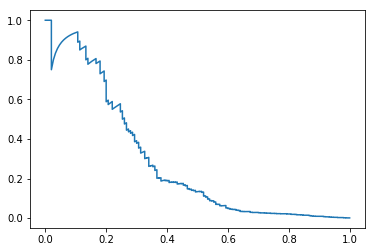

In [11]:
#Finally, plot the precision-recall curve for our classifier. 
#Use the function precision_recall_curve found in sklearn.metrics.

precision, recall, _ = precision_recall_curve(labels_data, scores_data)

pl.plot(recall, precision)
pl.show()

In [4]:
#Data test y train
train_data =np.load ("3dclothing/3dclothing_train.npy")
test_data =np.load ("3dclothing/3dclothing_test.npy")
#Matrix
train_labels = np.array([x.strip() for x in open('3dclothing/3dclothing_labels_train.txt')])
test_labels = np.array([x.strip() for x in open('3dclothing/3dclothing_labels_test.txt')])


IOError: [Errno 2] No such file or directory: '3dclothing/3dclothing_train.npy'